<a href="https://colab.research.google.com/github/rohith-ganesh/ML-MAJOR-APRIL--ML-04-BS5/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 21.7MB/s 


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs=SentimentIntensityAnalyzer()

In [3]:
#webscraping--beatidul soup 4

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os

In [4]:
urls=['https://inshorts.com/en/read/world',
              'https://inshorts.com/en/read/sports',
              'https://inshorts.com/en/read/politics',
      'https://inshorts.com/en/read/technology',
      'https://inshorts.com/en/read/entertainment','https://inshorts.com/en/read/automobile']

def build_dataset(urls):
  news_data=[]
  news_category=[]
  for url in urls:
    news_category=url.split('/')[-1]
    data=requests.get(url)
    soup= BeautifulSoup(data.content)
    
    news_articles=[{'news_headline':headline.find('span',attrs={"itemprop":"headline"}).string,
                    'news_article':article.find('div',attrs={"itemprop":"articleBody"}).string,
                    'news_category':news_category}
                   
                   for headline,article in zip(soup.find_all('div',class_=["news-card-title news-right-box"]),
                                               soup.find_all('div',class_=["news-card-content news-right-box"]))
                   ]
    news_articles=news_articles[0:20]
    news_data.extend(news_articles)

  df=pd.DataFrame(news_data)
  df=df[['news_headline','news_article','news_category']]
  return df

In [5]:
df= build_dataset(urls)
df.head()

,news_headline,news_article,news_category
0,"US' FDA delays use of India's Covaxin, asks to...",US' Food and Drug Administration (FDA) has del...,world
1,"Respect US FDA's decision on Covaxin, it won't...",After US FDA rejected emergency use approval t...,world
2,China releases new images including a 'selfie'...,China's Zhurong rover has sent back new images...,world
3,Italy will prosecute marines who killed Indian...,The Supreme Court on Friday said that the proc...,world
4,"1,000-year-old chicken egg found in pit contai...","Archaeologists have discovered a 1,000-year-ol...",world


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stopwords_list=nltk.corpus.stopwords.words('english')
len(stopwords_list)

179

In [8]:
stopwords_list.remove('no')
stopwords_list.remove('not')
len(stopwords_list)

177

In [9]:
def html_tag(text):
  soup=BeautifulSoup(text,"html.parser")
  new_text=soup.get_text()
  return new_text

In [10]:
!pip install contractions

     |████████████████████████████████| 327kB 31.1MB/s 
     |████████████████████████████████| 286kB 39.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85388 sha256=d622263b04a2563db169ec4510fc111394a152e6b899a9926674cb8464484868
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [11]:
import contractions
def con(text):
  expand=contractions.fix(text)
  return(expand)

#con("gotta")

'got to'

In [12]:
import re
def remove_sp(text):
  pattern=r'[^A-Za-z0-9\s]'
  text= re.sub(pattern,'',text)
  return text

In [13]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
def remove_stopwords(text):
  tokens=word_tokenize(text)
  tokens=[token.strip() for token in tokens]
  filtered_token=[token for token in tokens if token not in stopwords_list]
  filtered_text=' '.join(filtered_token)
  return filtered_text

In [15]:
remove_stopwords("The,and,if are all stopwords and even not")

'The , , stopwords even not'

In [16]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
  
# stem words in the list of tokenised words
def stem_lemm(text):
    word_tokens = word_tokenize(text)
    #stems = [stemmer.stem(word) for word in word_tokens ]
    #print(stems)
    lem=[lemmatizer.lemmatize(i,pos='v') for i in word_tokens]
    #print(lem)
    t=' '.join(lem)
    return t
  
#text = 'data science uses scientific methods algorithms and many types of processes'
#stem_lemm(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [17]:
df.news_headline =df.news_headline.apply(lambda x:x.lower())
df.news_article =df.news_article.apply(lambda x:x.lower())

df.news_headline =df.news_headline.apply(html_tag)
df.news_article =df.news_article.apply(html_tag)

df.news_headline =df.news_headline.apply(con)
df.news_article =df.news_article.apply(con)

df.news_headline =df.news_headline.apply(remove_sp)
df.news_article =df.news_article.apply(remove_sp)

df.news_headline =df.news_headline.apply(remove_stopwords)
df.news_article =df.news_article.apply(remove_stopwords)

#df.news_headline =df.news_headline.apply(stem_lemm)
df.news_article =df.news_article.apply(stem_lemm)


df.head()

,news_headline,news_article,news_category
0,us fda delays use indias covaxin asks file ful...,us food drug administration fda delay use bhar...,world
1,respect us fdas decision covaxin not impact va...,us fda reject emergency use approval bharat bi...,world
2,china releases new images including selfie sen...,chinas zhurong rover send back new image mar i...,world
3,italy prosecute marines killed indian fisherme...,supreme court friday say proceed two italian m...,world
4,1000yearold chicken egg found pit containing h...,archaeologists discover 1000yearold chicken eg...,world


In [18]:
df['compound']=df['news_article'].apply(lambda x: vs.polarity_scores(x)['compound'])

#df['review']=df['compound'].apply(lambda x : "happy"if  x > 0.5 else "sad", ['review'])
#df['Review']=df['compound'].apply(lambda x: "happy" if x > 0.5 else ("neutral" if (x <0.5 and x>-0.5) else "not happy"),['review'])
df['Review']=df['compound'].apply(lambda x: "positive" if x > 0.0 else "negative" ,['review'])

In [19]:
df.tail()

,news_headline,news_article,news_category,compound,Review
115,mahindra appoints extata motors design head bo...,mahindra group announce appointment pratap bos...,automobile,-0.3400,negative
116,anita frew appointed rollsroyces first woman c...,rollsroyce wednesday say anita frew succeed ia...,automobile,0.8481,positive
117,tesla cars camera helps arrest us man suspecte...,tesla cars dashcam footage help police arrest ...,automobile,-0.7269,negative
118,bajaj auto sales increase 114 271 lakh units m...,bajaj autos total vehicle sales increase 114 1...,automobile,0.3744,positive
119,maruti suzuki reports 71 decline total sales m...,maruti suzuki india report 71 decline total sa...,automobile,0.0000,negative


In [20]:
df.to_csv('data.csv',index=False)

In [21]:
from sklearn.model_selection import train_test_split
X = df.news_article
Y = df.Review
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=100)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [23]:
model = Pipeline([('vectorizer',TfidfVectorizer()),('classifier',LogisticRegression())])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_pred, y_test))

Accuracy :  0.625


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 3,  0],
       [ 9, 12]])

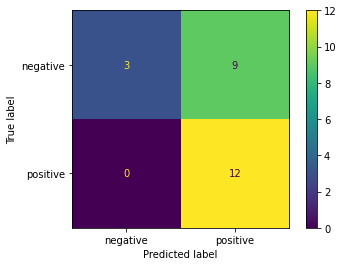

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

    negative       0.25      1.00      0.40         3
    positive       1.00      0.57      0.73        21

    accuracy                           0.62        24
   macro avg       0.62      0.79      0.56        24
weighted avg       0.91      0.62      0.69        24



In [31]:
example = ["good"]
result = model.predict(example)

print(result)

['positive']


In [32]:
import joblib
joblib.dump(model,'sentiment')

['sentiment']

In [33]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 25.5MB/s 
     |████████████████████████████████| 4.2MB 42.4MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 174kB 59.9MB/s 
     |████████████████████████████████| 112kB 49.3MB/s 
     |████████████████████████████████| 122kB 47.9MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [34]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('sentiment')
st.title('Sentiment Analysis')
ip = st.text_input("Enter the review")
op = model.predict([ip])
if st.button('Predict'):
  st.title(op[0])

Writing app.py


In [35]:
!nohup streamlit run app.py &
url= ngrok.connect(port='8501')
print(url)

nohup: appending output to 'nohup.out'
http://6ec6ea6a9e69.ngrok.io
